## Lecture 10 Data Wrangling with Pandas  

### Review of Lecture 9 

- about the basic file system of most computers

- how to find your command line 

- how to write some simple commands from within a jupyter notebook 

- how to write some simple commands from the command line

- about the _path_ to a file 

- how to load data files (csv, excel) using the Pandas library

### In this lecture we will:

- Learn how to filter data with Pandas

- Learn how to process a series of data files using the glob library

- Learn how to generate formatted strings for output (random...)

Let's use the Typhoon Yutu data you've processed before as an example to learn how to **filter** data with Pandas - very straightforward!   

First step, read the data file into Python using Pandas: (here we use the excel file as an example):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yutu = pd.read_excel("datasets/Yutu.xlsx")

yutu.head()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
0,2018,10,20,18,8.4,160.7,1008,0,0.0
1,2018,10,21,0,8.5,159.9,1008,0,2.0
2,2018,10,21,6,8.6,158.9,1004,0,2.0
3,2018,10,21,12,8.7,158.0,1006,0,2.0
4,2018,10,21,18,8.9,157.1,1004,0,2.0


In [2]:
yutu.tail()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
49,2018,11,2,0,20.7,116.4,1008,35,3.0
50,2018,11,2,6,20.7,116.1,1008,200,2.0
51,2018,11,2,12,20.5,116.0,1012,0,NaN
52,2018,11,2,18,20.2,115.9,1012,0,NaN
53,2018,11,3,0,19.9,115.7,1014,0,NaN


hmm, there are some NaNs (Not a Number) in the data file and we will deal with them later. You can also take a closer look at the columns "Pressure" in the datafrom mangkhut using column access + the head() function:

In [3]:
yutu["Pressure (hPa)"].head()

0    1008
1    1008
2    1004
3    1006
4    1004
Name: Pressure (hPa), dtype: int64

Or display multiple columns by specifying the column names as a list:

In [4]:
yutu[["Pressure (hPa)","Wind (kt)","Class"]].head()

,Pressure (hPa),Wind (kt),Class
0,1008,0,0.0
1,1008,0,2.0
2,1004,0,2.0
3,1006,0,2.0
4,1004,0,2.0


Now let's try to plot the relationship between pressure and wind speed of Typhoon Yutu

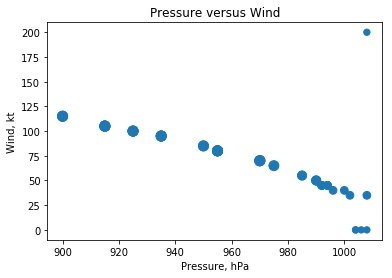

In [5]:
plt.scatter(yutu["Pressure (hPa)"], yutu["Wind (kt)"],yutu["Class"]*20)
plt.xlabel('Pressure, hPa')
plt.ylabel('Wind, kt')
plt.title("Pressure versus Wind")
plt.show()

There are two problems with the dataFrame and the plot: 

- The first thing to do is to drop those data points where NaN occurs. It is very straightforward to do in Pandas. 
- The second thing is that some data points are very weird (outliers) 

### Filter the dataFrame with Pandas

#### 1. Remove/Replace NaNs

Recall that there are a couple of NaNs in the last a few lines of the Yutu dataFrame:

In [6]:
yutu = pd.read_excel("datasets/Yutu.xlsx")
yutu.tail()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
49,2018,11,2,0,20.7,116.4,1008,35,3.0
50,2018,11,2,6,20.7,116.1,1008,200,2.0
51,2018,11,2,12,20.5,116.0,1012,0,NaN
52,2018,11,2,18,20.2,115.9,1012,0,NaN
53,2018,11,3,0,19.9,115.7,1014,0,NaN


Let's drop the NaN data rows using the **dropna()** function:

In [7]:
yutu = pd.read_excel("datasets/Yutu.xlsx")
yutu_no_nan = yutu.dropna()
yutu_no_nan.tail()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
46,2018,11,1,6,19.9,116.8,994,45,3.0
47,2018,11,1,12,20.2,116.8,994,45,3.0
48,2018,11,1,18,20.6,116.8,1000,40,3.0
49,2018,11,2,0,20.7,116.4,1008,35,3.0
50,2018,11,2,6,20.7,116.1,1008,200,2.0


Here the **dropna()** function removes the data rows with values of NaN. You could also fill the NaNs with zeros by using the **fillna()** function with an argument 0:

In [8]:
yutu = pd.read_excel("datasets/Yutu.xlsx")
yutu.tail()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
49,2018,11,2,0,20.7,116.4,1008,35,3.0
50,2018,11,2,6,20.7,116.1,1008,200,2.0
51,2018,11,2,12,20.5,116.0,1012,0,NaN
52,2018,11,2,18,20.2,115.9,1012,0,NaN
53,2018,11,3,0,19.9,115.7,1014,0,NaN


In [9]:
yutu_no_nan = yutu.fillna(0)
yutu_no_nan.tail()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class
49,2018,11,2,0,20.7,116.4,1008,35,3.0
50,2018,11,2,6,20.7,116.1,1008,200,2.0
51,2018,11,2,12,20.5,116.0,1012,0,0.0
52,2018,11,2,18,20.2,115.9,1012,0,0.0
53,2018,11,3,0,19.9,115.7,1014,0,0.0


#### 2. Adding a Column with  data values

In [10]:
yutu = pd.read_excel("datasets/Yutu.xlsx") # load data

yutu['Color'] = 'N/A'

yutu.head()

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class,Color
0,2018,10,20,18,8.4,160.7,1008,0,0.0,N/A
1,2018,10,21,0,8.5,159.9,1008,0,2.0,N/A
2,2018,10,21,6,8.6,158.9,1004,0,2.0,N/A
3,2018,10,21,12,8.7,158.0,1006,0,2.0,N/A
4,2018,10,21,18,8.9,157.1,1004,0,2.0,N/A


Now add another new column named "GradP", calculated as the absolute value of the measure pressure subtracted by the maximum pressure (in-class practice)

#### 3. Remove outliers  

There are multiple rules of removing data outliers. In lots of practices, the process of removing outliers could be very important and influential on your results, especially when you trying to do statistics (biased statistics!).   

In the Typhoon Yutu data, it is clear that there are a couple of outliers in the wind speed data: 
- a bunch of zeros and,
- one data point with a wind speed of 200! 

Now we need to do something to exclude (or filter) these data points before doing real analysis!  

First let's remove all the zeros by setting a constrain that all the "real" wind speed data should be greater than zero (that is, if the wind speed is zero, it's not a meaningful data point). The syntax of a basic Pandas filter is: 

**DataFrame.column_name[condition]** or **DataFrame[column_name][condition]**

Method 1: Do it like 1-D NumPy arrays

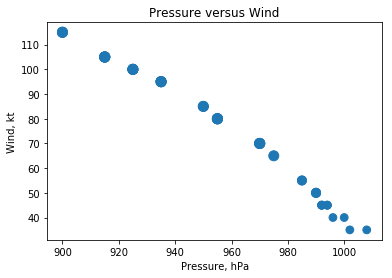

In [11]:
yutu = pd.read_excel("datasets/Yutu.xlsx") # load data

yutu = yutu.dropna() # drop NaNs first

data_good = (yutu["Wind (kt)"] > 0) & (yutu["Wind (kt)"] <= 150) # find the indices of good data points
                                                                 # 0 < wind <= 150
Pressure = yutu["Pressure (hPa)"][data_good] # using NumPy index slicing to generate a subset of the Pressure data
Wind = yutu["Wind (kt)"][data_good] # using NumPy index slicing to generate a subset of the Wind data
Class = yutu["Class"][data_good]   # the same thing for the Class of the Typhoon

plt.scatter(Pressure,Wind,Class*20) # a bubble plot
plt.xlabel('Pressure, hPa')  #labels
plt.ylabel('Wind, kt')
plt.title("Pressure versus Wind")
plt.show()

Method 2: Do using the .loc function (row access)

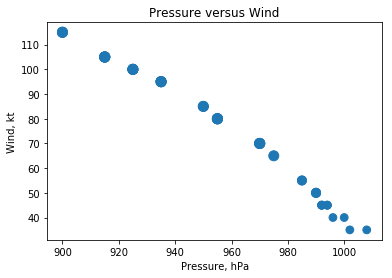

In [12]:
yutu = pd.read_excel("datasets/Yutu.xlsx") # load data

yutu = yutu.dropna() # drop NaNs first

yutu_good = yutu.loc[ (yutu["Wind (kt)"]>0) & (yutu["Wind (kt)"]<=150) ]

# now lets plot the data in the new data Frame called yutu_good
plt.scatter(yutu_good["Pressure (hPa)"], yutu_good["Wind (kt)"],yutu_good["Class"]*20)
plt.xlabel('Pressure, hPa')
plt.ylabel('Wind, kt')
plt.title("Pressure versus Wind")
plt.show()

For numeric data points, we can use the pd.cut() function to bin the datasets, for example:

/Users/patrickwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/patrickwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


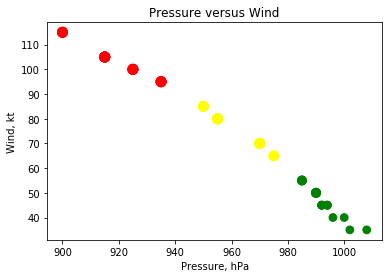

,ear,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class,Danger,Color
5,2018,10,22,0,9.4,156.1,1002,35,3.0,Light,green
6,2018,10,22,6,10.2,155.2,996,40,3.0,Light,green
7,2018,10,22,12,10.9,154.0,992,45,3.0,Light,green
8,2018,10,22,18,11.3,152.8,990,50,4.0,Light,green
9,2018,10,23,0,11.6,151.8,975,65,5.0,Medium,yellow


In [13]:
yutu = pd.read_excel("datasets/Yutu.xlsx") # load data

yutu = yutu.dropna() # remove NaN first
yutu_good = yutu.loc[ (yutu["Wind (kt)"]>0) & (yutu["Wind (kt)"]<=150) ] # filter data

bins = [0, 30, 60, 90, 120,150] # define 5 groups (bins) based on the wind speed
group_names = ['Calm','Light','Medium','Large','Super'] # define group names
color_names = ['blue','green','yellow','red','magenda'] # set colors to each group

yutu_good['Danger']=pd.cut(yutu_good['Wind (kt)'],bins,labels=group_names) # bin the data, create a new column
yutu_good['Color']=pd.cut(yutu_good['Wind (kt)'],bins,labels=color_names) # bin the data, create a new column

# now let's color the bubbles!
plt.scatter(yutu_good["Pressure (hPa)"], yutu_good["Wind (kt)"],yutu_good["Class"]*20, yutu_good.Color)
plt.xlabel('Pressure, hPa')
plt.ylabel('Wind, kt')
plt.title("Pressure versus Wind")
plt.show()

yutu_good.head()

Now let's revisit the GDP versus Life expectancy data set you've used in HW 4 (in-class practice problem)

#### 4. Filter Rows based on Conditions (sub-setting your data Frame)

In [24]:
file = "datasets/gdp_data.txt"
gdp = pd.read_csv(file)
gdp.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


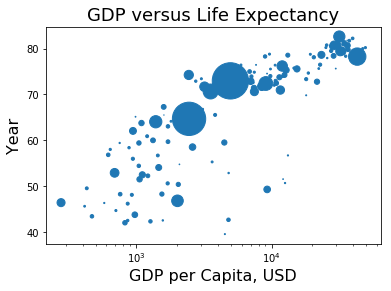

In [15]:
file = "datasets/gdp_data.txt"
gdp = pd.read_csv(file)

gdpPC = gdp.gdpPercap[gdp.year==2007] # select year 2007
life = gdp['lifeExp'][gdp.year==2007]
pop = gdp["pop"][gdp.year==2007]/1000000

plt.scatter(gdpPC,life,pop)
plt.xlabel('GDP per Capita, USD',fontsize=16)
plt.ylabel('Year',fontsize=16)
plt.title('GDP versus Life Expectancy',fontsize=18)
plt.xscale('log')

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


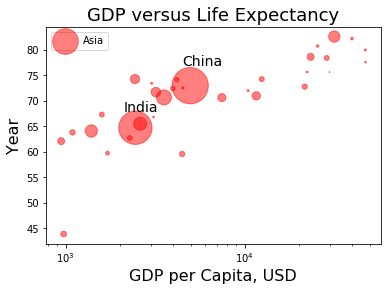

In [16]:
file = "datasets/gdp_data.txt"
gdp = pd.read_csv(file)

gdpPC = gdp.gdpPercap[(gdp.year==2007)&(gdp.continent=='Asia')]
life = gdp['lifeExp'][(gdp.year==2007)&(gdp.continent=='Asia')]
pop = gdp["pop"][(gdp.year==2007)&(gdp.continent=='Asia')]/1000000
plt.scatter(gdpPC,life,pop,color='r',alpha=0.5,label='Asia')

plt.text(4500,77,'China',fontsize=14)
plt.text(2100,68,'India',fontsize=14)
plt.xscale('log')
plt.xlabel('GDP per Capita, USD',fontsize=16)
plt.ylabel('Year',fontsize=16)
plt.title('GDP versus Life Expectancy',fontsize=18)

plt.xscale('log')
plt.legend()
gdp.head()

Can you find the outlier in Asia? Can you put on the same data for America and Africa? (in-class practice)

### Loading multiple Excel files (or csv, txt files)

Up to now, we have only opened single files and put their data into individual dataframes. Sometimes we will need to process a bunch of datasets from several Excel files in Python. How to do it?  
- The long way: type in the _file_names_ of individual data file and copy-paste the processing codes
- The short way: let Python do it automatically

The Long way seems quite straight forward when you have only a couple of data files to process, but what's the problem? if we were loading a hundred files instead of two, it would take hundreds of lines of code to do it this way. In the words of my friends in the startup community, it doesn't scale well. The short way, however, does scale, and it is really simple.

#### the glob module 

We use the glob module to process data sets with multiple files. The following code step through all the data files with a name pattern data*.xlsx, and combine the data together:

The Long Way:

In [17]:
all_data = pd.DataFrame() # create an empty data frame

# load the first data file named data1.xlsx
df = pd.read_excel("datasets/data1.xlsx")
all_data = all_data.append(df,ignore_index=True) # append to the empty data frame

# load the first data file named data2.xlsx
df = pd.read_excel("datasets/data2.xlsx")
all_data = all_data.append(df,ignore_index=True) # append to the empty data frame

# load the first data file named data3.xlsx
df = pd.read_excel("datasets/data3.xlsx")
all_data = all_data.append(df,ignore_index=True) # append to the empty data frame

all_data.head()

,fname,age,grade
0,Baker,14,90
1,Josephine,19,100
2,Calvin,15,66
3,Aretha,17,84
4,Britanney,19,66


In [18]:
import glob

files = glob.glob("datasets/data*.xlsx") # generate a list of all the files with name pattern data*.xlsx

print(files)

['datasets/data3.xlsx', 'datasets/data2.xlsx', 'datasets/data1.xlsx']


Now let's step through all the data files. The following code loop through the files with name patter data*.xlsx, and merge them together as one data frame:

In [19]:
all_data = pd.DataFrame() # create an empty data frame

for f in files:
    df = pd.read_excel(f)
    print(f)
    all_data = all_data.append(df,ignore_index=True)

all_data.head()

datasets/data3.xlsx
datasets/data2.xlsx
datasets/data1.xlsx


,fname,age,grade
0,Aretha,18,86
1,Amber,18,65
2,Serena,14,71
3,Jada,14,99
4,Althea,19,100


In [27]:
import glob

files = glob.glob("datasets/*.xlsx") 

print(files)

['datasets/data3.xlsx', 'datasets/data2.xlsx', 'datasets/SalesIQData.xlsx', 'datasets/Jongdari.xlsx', 'datasets/Yutu.xlsx', 'datasets/CollegeRecruitingData.xlsx', 'datasets/fdicdata.xlsx', 'datasets/data1.xlsx', 'datasets/axisdata.xlsx', 'datasets/mangkhut.xlsx', 'datasets/gradedata.xlsx', 'datasets/brics.xlsx', 'datasets/algebradata.xlsx']


There's an interesting function .describe() for a data frame, it gives you a statistical description of your data set:

In [20]:
all_data.describe()

,age,grade
count,300.000000,300.000000
mean,16.456667,82.923333
std,1.700321,10.544576
min,14.000000,65.000000
25%,15.000000,73.750000
50%,16.000000,82.000000
75%,18.000000,92.000000
max,19.000000,100.000000


### Formatting strings in Python

Now for a word about formatting strings.    Notice how the output of  the above print statement printed out all the decimal places.  We can do better!
To show only the first decimal place we can use _string formatting_.  

The structure of a formatting statement is:

**'%FMT'%(DATA)**, 

where **FMT** is a 'format string' and **DATA** is the variable name whose value we want to format.   Here is an example in which the FMT is: 

**3.1f**.  

The first number (3) is the number of characters in the output. The second number (1) is the number of characters AFTER the decimal place.   The 'f' means that DATA is a floating point variable.  

Other format strings include:  %s for a string, %i for an integer, %e for 'scientific notation'.  

In [21]:
def great_circle(lat_1,lon_1,lat_2,lon_2):
    """
    This code calculates the distance between two spatial points on the Earth
    INPUT: Point #1 (lat_1, lon_1) and Point #2 (lat_2, lon_2) in degrees
    OUTPUT: Distance in km
    Algorithm: Simple 3-D geometry calculation assuming the Earth is a perfect sphere
    """
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2=90.-lat_1,90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=lon_2-lon_1
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),np.radians(colat_2),np.radians(alpha)# continued line from above
    # from spherical trig we know that:
    cosa=np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha)
    # solve for a
    a=np.arccos(cosa)# take the arc cosine of cosa
    # remember to convert back to degrees!  
    distance = a*6380 # distance in km
    return distance

lat_BJ = 39.9
lon_BJ = 116.4

lat_DC = 38.9
lon_DC = -77.0

Delta = great_circle(lat_BJ,lon_BJ,lat_DC,lon_DC)

print ('no formatting: ',Delta) # no formatting
print ('formatted: ','%3.2f'%(Delta)) # with formatting

# or can use round(Delta,1) 
print ('rounded: ',round(Delta,1))

no formatting:  11163.277793813373
formatted:  11163.28
rounded:  11163.3


In [22]:
Data = np.pi

print ('no formatting: ',Data) # no formatting
print ('formatted: ','%3.2f'%(Data)) # with formatting

# or can use round(Delta,1)
print ('rounded: ',round(Data,2))

no formatting:  3.141592653589793
formatted:  3.14
rounded:  3.14


Or scientific notations:

In [23]:
print ('%6.5e'%(Delta))
print ('%3.2e'%(Delta))

1.11633e+04
1.12e+04
